In [1]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in c:\programdata\anaconda3\lib\site-packages (0.1.63)
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd 
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Download the market price for AAPL ticker 
df = yf.download ("AAPL", start = "2000-01-01", end = "2010-12-31", progress= False)

# Select the "Adj Close" column for analysis
df = df.loc [:, ["Adj Close"]]

# Rename the header 
df.rename (columns = {"Adj Close" : "adj_close"}, inplace = True) 

df

,adj_close
Date,
1999-12-31,0.789364
2000-01-03,0.859423
2000-01-04,0.786965
2000-01-05,0.798481
2000-01-06,0.729382
...,...
2010-12-23,9.938018
2010-12-27,9.971185
2010-12-28,9.995453


In [7]:
# Calculate the simple returns 
df["simple_rtn"] = df.adj_close.pct_change()

# Print the first 5 rows 
df.head()

,adj_close,simple_rtn
Date,,
1999-12-31,0.789364,NaN
2000-01-03,0.859423,0.088754
2000-01-04,0.786965,-0.084310
2000-01-05,0.798481,0.014633
2000-01-06,0.729382,-0.086538


In [17]:
# Calculate the rolling mean and standard deviation
# Rolling mean and standard deviation based on past 21 trading days (1 month)

df_rolling = df[["simple_rtn"]].rolling(window = 21).agg(["mean", "std"])
df_rolling.columns = df_rolling.columns.droplevel()

df_rolling

,mean,std
Date,,
1999-12-31,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
...,...,...
2010-12-23,0.002274,0.008078
2010-12-27,0.001496,0.007040
2010-12-28,0.001582,0.007040


In [19]:
# Join the rolling metrics to the original data
df_outliers = df.join(df_rolling)

df_outliers

,adj_close,simple_rtn,mean,std
Date,,,,
1999-12-31,0.789364,NaN,NaN,NaN
2000-01-03,0.859423,0.088754,NaN,NaN
2000-01-04,0.786965,-0.084310,NaN,NaN
2000-01-05,0.798481,0.014633,NaN,NaN
2000-01-06,0.729382,-0.086538,NaN,NaN
...,...,...,...,...
2010-12-23,9.938018,-0.004798,0.002274,0.008078
2010-12-27,9.971185,0.003337,0.001496,0.007040
2010-12-28,9.995453,0.002434,0.001582,0.007040


In [28]:
# Define a function for detecting outliers 
# Function for identifying outliers using 3 sigma rule. 
# Row must contain following columns: simple_rtn, mean, std
# n_sigmas: number of standard deciations above/below the mean

# Returns - An integer with 1 indicating outlier. 

def identify_outliers (row, n_sigmas = 3):
    x = row ["simple_rtn"]
    mu = row ["mean"]
    sigma = row ["std"]
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else: 
        return 0

In [36]:
# Identify the ouliers and extract their values for later use: 
df_outliers ["outlier"] = df_outliers.apply(identify_outliers, axis = 1)
outliers = df_outliers.loc [df_outliers ["outlier"] == 1, ["simple_rtn"]]

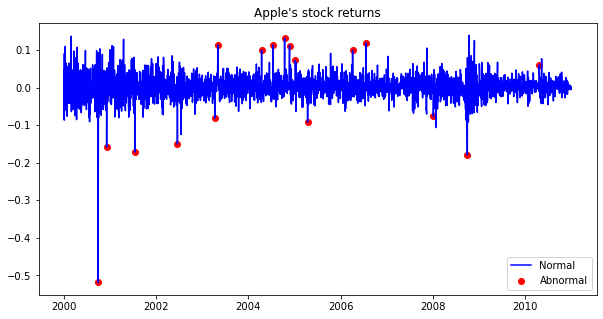

In [63]:
# Plot the results 
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot (df_outliers.index, df_outliers.simple_rtn, color = "blue", label = "Normal")
ax.scatter (outliers.index, outliers.simple_rtn, color = "red", label = "Abnormal")
ax.set_title ("Apple's stock returns")
ax.legend (loc = "lower right")

plt.show()